In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [10]:
# Initial setup
receiver_pos = np.array([0.0, 0.0])
#receiver_pos = np.array([120.0, -10.0])
target_pos = np.array([100.0, -5.0])
attacker_pos = np.array([80.0, -10.0])  # Stationary attacker near the target

# Constants
r = 25  # Spoofing range
v_receiver = 1.0
dt = 1
timesteps = 2000

# Paths
receiver_path = [receiver_pos.copy()]
attacker_path = [attacker_pos.copy()]
spoofed_path = []

spoofed = False
spoof_time = None
fake_shift = np.array([10.0, -10.0])  # Receiver thinks it's 10 units NE of actual

In [11]:
for t in range(timesteps):
    # Check for spoofing condition
    dist_to_receiver = np.linalg.norm(attacker_pos - receiver_pos)
    dist_to_target = np.linalg.norm(attacker_pos - target_pos)

    if not spoofed and dist_to_receiver <= r and dist_to_target <= r:
        spoofed = True
        spoof_time = t
        print(f"Spoofed at t={t}, true pos={receiver_pos}, attacker={attacker_pos}, distance={dist_to_receiver:.2f}")

    # Compute movement direction
    if spoofed:
        # Receiver thinks it's somewhere else
        perceived_pos = receiver_pos + fake_shift
        direction = target_pos - perceived_pos
    else:
        direction = target_pos - receiver_pos

    norm = np.linalg.norm(direction)
    if norm < 1e-8:
        direction = np.zeros_like(direction)
    else:
        direction = direction / norm

    receiver_pos += v_receiver * direction * dt

    if spoofed:
        spoofed_path.append(receiver_pos.copy())

    receiver_path.append(receiver_pos.copy())
    attacker_path.append(attacker_pos.copy())  # Stationary attacker

receiver_path = np.array(receiver_path)
attacker_path = np.array(attacker_path)
spoofed_path = np.array(spoofed_path)



Spoofed at t=57, true pos=[56.92888332 -2.84644417], attacker=[ 80. -10.], distance=24.15


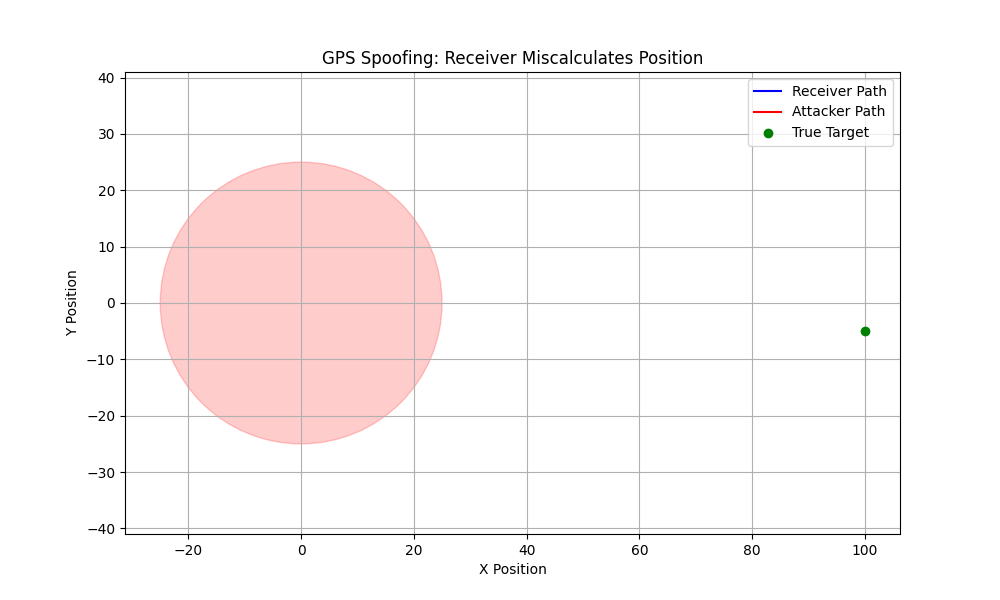

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 120)
ax.set_ylim(-30, 60)
ax.set_title("GPS Spoofing: Receiver Miscalculates Position")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.grid(True)
ax.axis("equal")

# Plot elements
line_receiver, = ax.plot([], [], 'b-', label='Receiver Path')
line_attacker, = ax.plot([], [], 'r-', label='Attacker Path')
dot_receiver, = ax.plot([], [], 'bo')
dot_attacker, = ax.plot([], [], 'ro')
circle_range = plt.Circle((0, 0), r, color='r', alpha=0.2)
ax.add_patch(circle_range)
target_dot = ax.plot(target_pos[0], target_pos[1], 'go', label='True Target')[0]

ax.legend()

def init():
    line_receiver.set_data([], [])
    line_attacker.set_data([], [])
    dot_receiver.set_data([], [])
    dot_attacker.set_data([], [])
    circle_range.center = (0, 0)
    return line_receiver, line_attacker, dot_receiver, dot_attacker, circle_range

def update(i):
    if i >= len(receiver_path):
        return

    line_receiver.set_data(receiver_path[:i, 0], receiver_path[:i, 1])
    line_attacker.set_data(attacker_path[:i, 0], attacker_path[:i, 1])
    dot_receiver.set_data(receiver_path[i, 0], receiver_path[i, 1])
    dot_attacker.set_data(attacker_path[i, 0], attacker_path[i, 1])
    circle_range.center = (attacker_path[i, 0], attacker_path[i, 1])

    return line_receiver, line_attacker, dot_receiver, dot_attacker, circle_range

ani = FuncAnimation(fig, update, frames=len(receiver_path), init_func=init,
                    interval=100, blit=True)

plt.show()